# CM1 "Iris" dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Starting with "Iris" dataset

In [ ]:
df = pd.read_csv('iris_dataset_missing.csv')
print(df.shape)
number_of_rows, _ = df.shape
df.head(20)

(105, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
5,6.707485,3.093846,5.048317,2.373470,Iris-virginica
6,4.811740,3.037915,1.494268,-0.042428,Iris-setosa
7,5.205868,NaN,1.675654,0.112269,Iris-setosa
8,4.436832,2.867772,1.428415,0.385249,Iris-setosa
9,6.847619,3.132270,5.878479,2.166297,Iris-virginica


#**Deciding on the type of data filling**

Let's see what values are missing.

In [ ]:
print("Reference is from here: {}".format("https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd"))
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)
print("\n")
sums = df.loc[:,list(num_vars)].isnull().sum() 
binary_sums = sums > 0
print("Number of missed values: {} which is {} of data".format(sums.sum(), (sums.sum() / number_of_rows).round(2)))
print("Description: \n{}".format(sums[binary_sums]))

Reference is from here: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Index(['species'], dtype='object')


Number of missed values: 12 which is 0.11 of data
Description: 
sepal_width     4
petal_length    8
dtype: int64


So, as you see these are the number of missed values from this dataset.

**The numeric type missed values:**

sepal_width, petal_length



For the numeric types we can use many types of replacing with guessing.

# Filling numerical type values

In [ ]:
df_types = []

Since in the "heart disease" it was observed that the "intellij_mean" method was not the best method, here it will be the same. Because in here there are ~10% of the dataset with missed values but in "heart disease" it was ~20% which also some of them were from important features. Therefore, here the impact of missing data is less on the accuracy of KNN and "intellij_mean" would not be the best method. So, we will ignore it for the iris dataset.

**using normal mean for replacing**

In [ ]:
df_normmean = df.fillna(df.mean())
df_types.append({"name": "df_normmean", "df": df_normmean})
df_normmean

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
...,...,...,...,...,...
100,4.874848,3.217348,1.592887,0.123588,Iris-setosa
101,5.564197,2.771731,3.483588,1.074754,Iris-versicolor
102,5.548047,4.249211,1.453466,0.214527,Iris-setosa
103,5.510482,2.652867,4.276817,1.298032,Iris-versicolor


**Using interpolation**

All in all, interpolation here is not a good idea (in my opinion). Because the interpolation methods here use values from the previous or next ones in the dataset for each feature. This is good when the dataset consists of time-series data which the datapoints are not independent from each other and the order of data can't be changed. However, here the datapoints are independent from each other because reordering of data should not have an effect on the result of the ML algorithm. So, when interpolation is used here we might see good results but it is not reliable and also it will be changed when data is shuffled. However, we will test it with the ML algorithms.

Simple interpolation (linear method)


In [ ]:
df_interp_default = df.interpolate()
df_types.append({"name": "df_interp_default", "df": df_interp_default})
df_interp_default

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
...,...,...,...,...,...
100,4.874848,3.217348,1.592887,0.123588,Iris-setosa
101,5.564197,2.771731,3.483588,1.074754,Iris-versicolor
102,5.548047,4.249211,1.453466,0.214527,Iris-setosa
103,5.510482,2.652867,4.276817,1.298032,Iris-versicolor


For the goal of smooth plotting akima from scipy is good

In [ ]:
df_interp_akima = df.interpolate(method='akima')
df_types.append({"name": "df_interp_akima", "df": df_interp_akima})
df_interp_akima


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
...,...,...,...,...,...
100,4.874848,3.217348,1.592887,0.123588,Iris-setosa
101,5.564197,2.771731,3.483588,1.074754,Iris-versicolor
102,5.548047,4.249211,1.453466,0.214527,Iris-setosa
103,5.510482,2.652867,4.276817,1.298032,Iris-versicolor


Nearest method of scipy

In [ ]:
df_interp_nearest = df.interpolate(method='nearest')
df_types.append({"name": "df_interp_nearest", "df": df_interp_nearest})
df_interp_nearest

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
...,...,...,...,...,...
100,4.874848,3.217348,1.592887,0.123588,Iris-setosa
101,5.564197,2.771731,3.483588,1.074754,Iris-versicolor
102,5.548047,4.249211,1.453466,0.214527,Iris-setosa
103,5.510482,2.652867,4.276817,1.298032,Iris-versicolor


Cubic interpolation (smoother than linear)

In [ ]:
df_interp_cubic = df.interpolate(method='cubic')
df_types.append({"name": "df_interp_cubic", "df": df_interp_cubic})
df_interp_cubic

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
...,...,...,...,...,...
100,4.874848,3.217348,1.592887,0.123588,Iris-setosa
101,5.564197,2.771731,3.483588,1.074754,Iris-versicolor
102,5.548047,4.249211,1.453466,0.214527,Iris-setosa
103,5.510482,2.652867,4.276817,1.298032,Iris-versicolor


**Another method is to just drop all the missed values**

In [ ]:
df_dropedna = df.dropna()
df_types.append({"name": "df_dropedna", "df": df_dropedna})
df_dropedna

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
...,...,...,...,...,...
100,4.874848,3.217348,1.592887,0.123588,Iris-setosa
101,5.564197,2.771731,3.483588,1.074754,Iris-versicolor
102,5.548047,4.249211,1.453466,0.214527,Iris-setosa
103,5.510482,2.652867,4.276817,1.298032,Iris-versicolor


**Important warning again**

Interpolation and smoothing methods heavily rely on the position of the data. Meaning that the missed data is guessed/estimated based on the before or after values of that feature (best fit for time-series data). So, when data is shuffled these methods would not be very effective. Should be investigated with the ML methods.



DF method: df_normmean
DF method: df_interp_default
DF method: df_interp_akima
DF method: df_interp_nearest
DF method: df_interp_cubic
DF method: df_dropedna


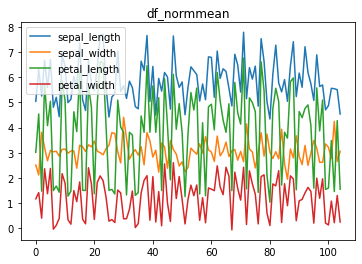

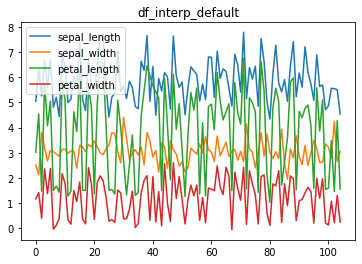

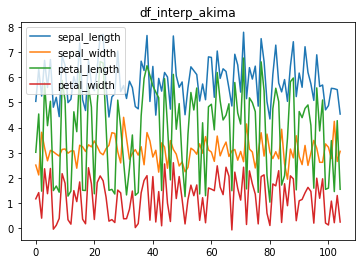

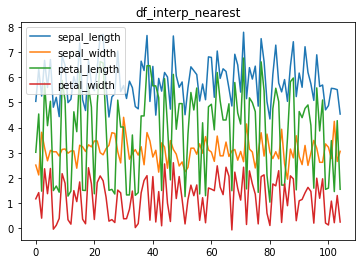

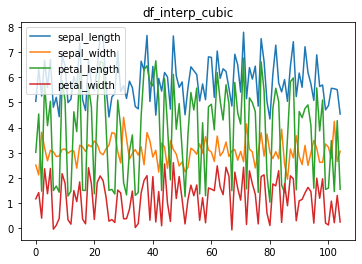

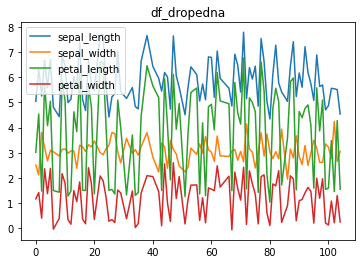

In [ ]:
for df_type in df_types:
  print("DF method: {}".format(df_type["name"]))
  df_type["df"].plot(title=df_type["name"])

# Data smoothing


First let's see that if there are anomalies or noise in the data such that is visible even by eye!

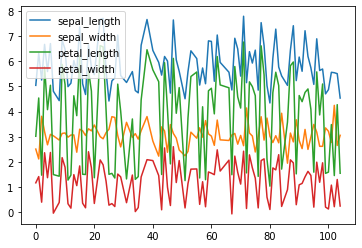

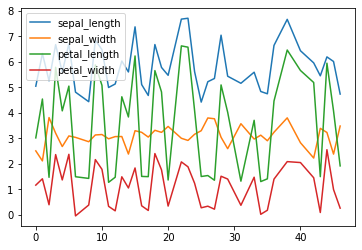

In [ ]:
df_dropedna.head(100).plot()
df_dropedna.head(40).plot()

**First consideration**

I believe that data smoothing would not be a good idea here and this is because that the numerical values are not that much different and with smoothing they will become even more alike (less distance from each other) and this will make it harder for the algorithm to distinguish them from each other. However, it may have a positive effect by removing noise when data is not shuffled (which we will do it by applying normalization methods).

**Second consideration**

Just like the warning for the "interpolation" section, here again smoothing does not help (because data is not time-series and data position should not have an affect on the value of feature). Therefore, the smoothing methods like moving average is not suitable. 

# Normalization

Data normalization for all the features may not be a good idea (based on the first explanation in the Data smoothing section) but for the ones that have high varience would be good. By looking at the plot of dataset, we can see that "petal_length" feature is one of the features that can be normalized but "petal_width" is not good because it does not have high varience. Let's print out the std and the mean of each feature and sort them to find out the features that is best to normalize.


In [ ]:
s1 = df_dropedna.std().sort_values(ascending=False)
s2 = df_dropedna.mean().sort_values(ascending=False)

df_concat = pd.DataFrame([s1,s2],index=['STD',"Mean"])
df_concat

,petal_length,sepal_length,petal_width,sepal_width
STD,1.811399,0.892271,0.793656,0.439463
Mean,3.808118,5.867894,1.209826,3.054935


So the best approach is to normalize these features:

petal_length


The other values are not that much significant and normalization may degrade the performance of the ML algorithm. However, it should be confirmed.

In [ ]:
def normalizer(column, df_to_normalize, zed_score=False):
  if not zed_score:
    max = df_to_normalize[column].max()
    min = df_to_normalize[column].min()
    denominator = max - min 

    normalized_column = df_to_normalize[column].apply(lambda x: (x - min) / denominator)

  else:
    mean_col = df_to_normalize[column].mean()
    std_col = df_to_normalize[column].std() 

    normalized_column = df_to_normalize[column].apply(lambda x: (x - mean_col) / std_col)

  dropped = df_to_normalize.drop(columns=column)
  dropped[column] = normalized_column

  return dropped


## minmax normalize

,sepal_length,sepal_width,petal_width,petal_length,species
0,5.045070,2.508203,1.164924,0.346084,Iris-versicolor
1,6.325517,2.115481,1.413651,0.611799,Iris-versicolor
2,5.257497,3.814303,0.395348,0.076301,Iris-setosa
3,6.675168,3.201700,2.362764,0.828588,Iris-virginica
4,5.595237,2.678166,1.369266,0.530848,Iris-versicolor
...,...,...,...,...,...
100,4.874848,3.217348,0.123588,0.097611,Iris-setosa
101,5.564197,2.771731,1.074754,0.427255,Iris-versicolor
102,5.548047,4.249211,0.214527,0.073303,Iris-setosa
103,5.510482,2.652867,1.298032,0.565555,Iris-versicolor


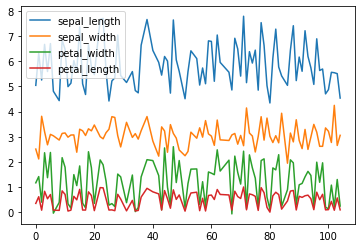

In [ ]:
columns_to_normalize = ["petal_length"]

for index, column in enumerate(columns_to_normalize):
  if index == 0:
    dropped = normalizer(column, df_dropedna)
  else:
    dropped = normalizer(column, dropped)

dropped_target = dropped["species"]
tmp = dropped.drop(columns=["species"])
tmp["species"] = dropped_target

normalized_minmax = tmp.copy()
normalized_minmax.plot()
normalized_minmax


## z-score normalize

,sepal_length,sepal_width,petal_width,petal_length,species
0,5.045070,2.508203,1.164924,-0.436179,Iris-versicolor
1,6.325517,2.115481,1.413651,0.405175,Iris-versicolor
2,5.257497,3.814303,0.395348,-1.290416,Iris-setosa
3,6.675168,3.201700,2.362764,1.091611,Iris-virginica
4,5.595237,2.678166,1.369266,0.148853,Iris-versicolor
...,...,...,...,...,...
100,4.874848,3.217348,0.123588,-1.222939,Iris-setosa
101,5.564197,2.771731,1.074754,-0.179160,Iris-versicolor
102,5.548047,4.249211,0.214527,-1.299908,Iris-setosa
103,5.510482,2.652867,1.298032,0.258749,Iris-versicolor


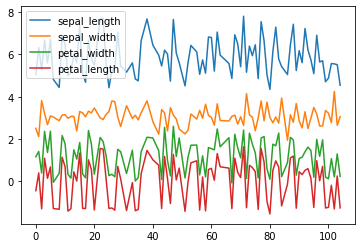

In [ ]:
columns_to_normalize = ["petal_length"]

for index, column in enumerate(columns_to_normalize):
  if index == 0:
    dropped = normalizer(column, df_dropedna, zed_score=True)
  else:
    dropped = normalizer(column, dropped, zed_score=True)

dropped_target = dropped["species"]
tmp = dropped.drop(columns=["species"])
tmp["species"] = dropped_target

normalized_zscore = tmp.copy()
normalized_zscore.plot()
normalized_zscore

## The evaluator based on the best parameters for KNN (from part 2 of the assignment)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


def eval_preproc(data, heart_ds=True, normalization=False):
  if heart_ds:
    data_target = data["target"]
    data_target = data_target.to_numpy()
    data_features = data.drop('target', axis=1)
    data_features = data_features.to_numpy()
  else:
    data_target = data["species"]
    data_target = data_target.to_numpy()
    data_target[data_target=="Iris-versicolor"] = 0
    data_target[data_target=="Iris-setosa"] = 1
    data_target[data_target=="Iris-virginica"] = 2
    data_target=data_target.astype('int')
    data_features = data.drop('species', axis=1)
    data_features = data_features.to_numpy()  

  if normalization:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(data_features)
    data_features = scaler.transform(data_features)


  KNN = KNeighborsClassifier(n_neighbors=5)
  scores = cross_val_score(KNN, data_features, data_target, cv=5, scoring='accuracy')
  accuracy = scores.mean()
  return accuracy


# Evaluating Normalization Methods



In [ ]:
normalized_dfs = [normalized_minmax, normalized_zscore, df_dropedna]

for index, df_normals in enumerate(normalized_dfs):

  if index == 0:
    norm_method = "customized features minmax"
  elif index == 1:
    norm_method = "customized features zscore"
  elif index == 2:
    norm_method = None

  if norm_method:
    print("The normalization method is: \n{}".format(norm_method))
    print("Accuracy for the KNN with best parameters is:")
    print(eval_preproc(df_normals,heart_ds=False))
    print("\n")
  else:
    print("The normalization method is: \n{}".format("Nothing!"))
    print("Accuracy for the KNN with best parameters is:")
    print(eval_preproc(df_normals,heart_ds=False))
    print("\n")

    print("The normalization method is: \n{}".format("Simple MinMax"))
    print("Accuracy for the KNN with best parameters is:")
    print(eval_preproc(df_normals, normalization=True,heart_ds=False))

The normalization method is: 
customized features minmax
Accuracy for the KNN with best parameters is:
0.9450292397660819


The normalization method is: 
customized features zscore
Accuracy for the KNN with best parameters is:
0.9456140350877191


The normalization method is: 
Nothing!
Accuracy for the KNN with best parameters is:
0.9461988304093566


The normalization method is: 
Simple MinMax
Accuracy for the KNN with best parameters is:
0.9456140350877191


## Best normalization

For this data set normalization does not have a considerable effect as you can see we will achieve 94% accuracy with any normalization method or without it at all.

## Evaluating the filling methods for the missed values (without normalization)

In [ ]:
for df_type in df_types:
  print("The filling method is: \n{}".format(df_type["name"]))
  print("Accuracy for the KNN with best parameters is:")
  print(eval_preproc(df_type["df"], heart_ds=False))
  print("\n")

The filling method is: 
df_normmean
Accuracy for the KNN with best parameters is:
0.9142857142857143


The filling method is: 
df_interp_default
Accuracy for the KNN with best parameters is:
0.9428571428571428


The filling method is: 
df_interp_akima
Accuracy for the KNN with best parameters is:
0.9428571428571428


The filling method is: 
df_interp_nearest
Accuracy for the KNN with best parameters is:
0.9142857142857143


The filling method is: 
df_interp_cubic
Accuracy for the KNN with best parameters is:
0.9428571428571428


The filling method is: 
df_dropedna
Accuracy for the KNN with best parameters is:
0.9461988304093566




As expected from the "heart desease" dataset, again the dropping of all missed values yields best results. Additionaly, the interpolation methods are in the same range and close to "dropedna" (dropping all missed values).

# CM2 "Iris" dataset

# Pair plotting

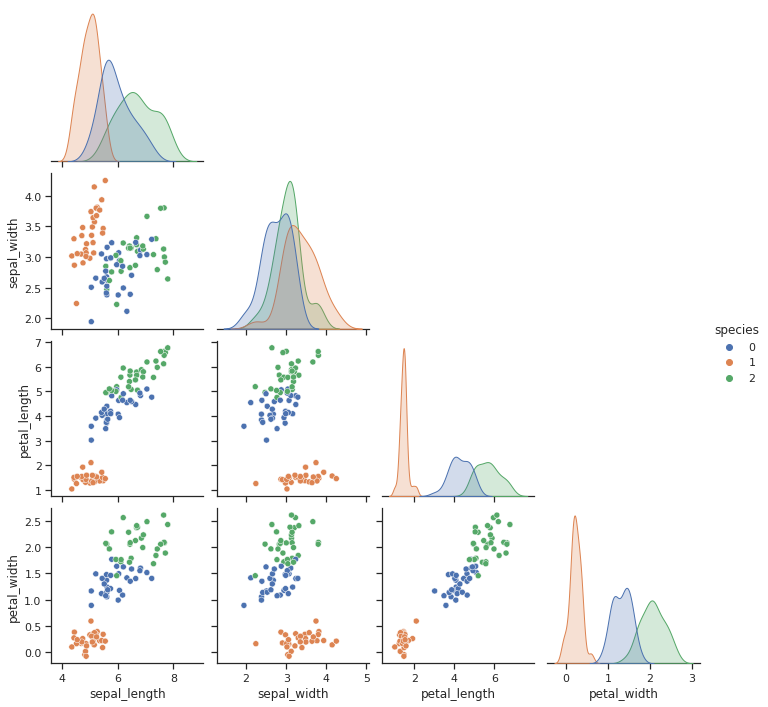

In [ ]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_dropedna, hue="species", palette="deep", corner=True)


import matplotlib.pyplot as plt

plt.show()

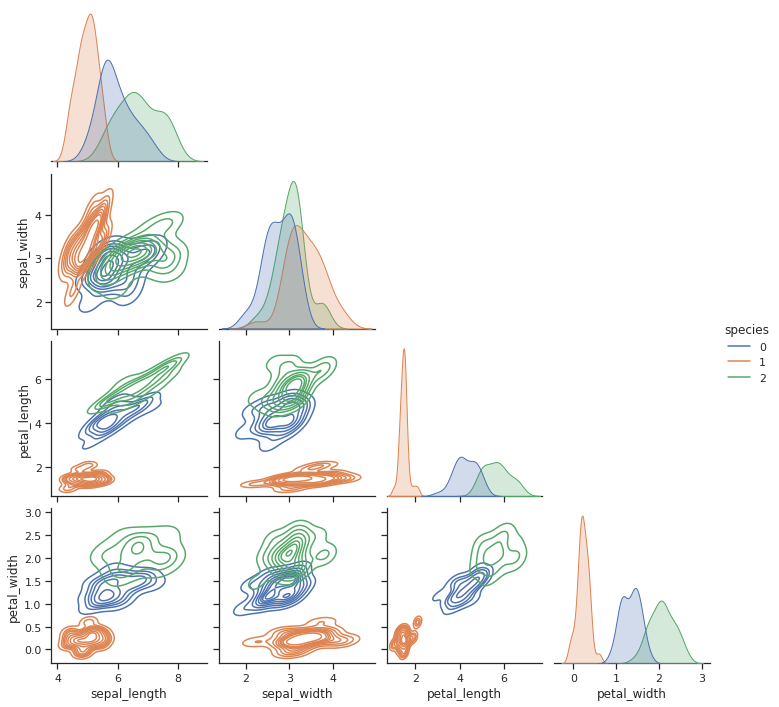

In [ ]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_dropedna, hue="species", corner=True, palette="deep", kind="kde")


import matplotlib.pyplot as plt

plt.show()

It can be seen that "sepal_length" has a great positive correlation with "petal_width" and "petal_length".

Additionaly, "petal_length" and "petal_width" have a near perfect positive correlation (the shape is like a line almost!).

# CM3 "Iris" dataset

In [ ]:
df_dropedna_clone = df_dropedna.copy()
df_dropedna_clone["species"].replace({"Iris-versicolor": 0, "Iris-setosa": 1, "Iris-virginica": 2}, inplace=True)
df_dropedna_clone.corr(method="spearman")

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.056325,0.894497,0.838426,0.306602
sepal_width,-0.056325,1.000000,-0.140461,-0.158933,0.269320
petal_length,0.894497,-0.140461,1.000000,0.920593,0.453771
petal_width,0.838426,-0.158933,0.920593,1.000000,0.455734
species,0.306602,0.269320,0.453771,0.455734,1.000000


**Correlation with label (species) value**

**What to drop**


First of all, the features that have very low correlation with "species" can be likely dropped. However, unlike "heart disease" dataset, the least correlation here is still high (0.26) and it shouldn't be dropped based on this inerpretion only.


**What is the most important to keep**

The higher the feature has correlation with the "species" the more important the feature is for classifying. If we set a threshold of abs(0.45) for the correlation coefficients, we can see that "petal_length", "petal_width" have more or around abs(0.45) correlation with "species". These features are the most important for "species".

**What may be dropped and not loosing much info**

Now if we can find high correlations between these features and other features, we can simply remove the other correlated features. Because they are predictable by the selected "petal_length", "petal_width" features and are not adding much new info to the model.

We set threshold here at abs(0.6). it is higher than the abs(0.45) because we want to ensure that information is kept as much as possible by removing the correlating features. For "petal_length" it can be seen that "sepal_length" and "petal_width" have high correlation with it. "sepal_length" doesn't have much correlation with "species" so it would be safe to drop it with not loosing much information. For "petal_width" it can be seen that "petal_length" and "sepal_length" have high correlation with it. So just keeping one of the "petal_width" or "petal_length" is enough and intrisically have the information of the other one. However, the "petal_length" has more info on "sepal_length" therefore dropping the "petal_width" is better to keep more info from "sepal_length".

**Decide for the KNN model, what to keep, what to drop**

Here the dataset is considerably small (around 100 datapoints). In addition, the number of features are only 4! Lastly, the model itself is not that heavy for this number of datapoints and features (KNN). Therefore it doesn't hurt anyone to keep all the features untouched! by removing the possible candidate (stated above) we gain a little performance boost (not much) but may loose (again not much) information. However, compared to "heart disease dataset" it is safer to drop two features (to name: "petal_length" and "sepal_length"). By experimenting we found out that dropping the "petal_length" and "sepal_length" features as expected, is safe and help improving the results of the KNN.



-----------------------------------

**Correlation of features with each other**


It can be seen that "sepal_length" has a great positive correlation with "petal_width" (0.8 which is very high) and "petal_length" (~0.9 which makes it almost perfect correlated).

Additionaly, "petal_length" and "petal_width" have a near perfect positive correlation which totally makes sense(0.92 which is very close to 1).

On average "sepal_length" has the highest correlation with other features. Also, it means that it can be interpolated (for missed values) based on the high correlating feature that has data. For example, if the missed values are from "petal_length" we can estimate/interpolate it with the corresponding "sepal_length" value.

All in all, features in this data set is highly correlated in comparsion to "heart disease" dataset.

In [ ]:
pd.DataFrame(data=[df_dropedna.mean(), df_dropedna.var(), df_dropedna.skew(), df_dropedna.kurtosis()], index=["Mean","Var","Skew","Kurtosis"], columns = df_dropedna.columns).drop(columns=["species"])

,sepal_length,sepal_width,petal_length,petal_width
Mean,5.867894,3.054935,3.808118,1.209826
Var,0.796147,0.193128,3.281167,0.629890
Skew,0.424681,0.186780,-0.238250,-0.101132
Kurtosis,-0.677755,0.326975,-1.412103,-1.319590


**Variance method**

"The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods." source: https://ranasinghiitkgp.medium.com/implementing-feature-selection-methods-for-machine-learning-bfa2e4b4e02

Therefore here the variance threshold indicates that "sepal_width" and "sepal_length" can be removed. But it is safer to keep the "sepal_width" because it's value is not predictable by the other features (based on the correlation coefficient).

By looking at their plot of data (a little above) we can see that many of the features have a normal distribution alike (for each label) form which means that the sampling of data is pretty good and informative (eg. look at petal_width feature).

The skewness of features are almost in the same range (positive or negative) which also makes sense. However, the "sepal_length" has double amount of the average range and is more skewed.

"petal_width" and "petal_length" has higher kurtosis values (absolute) which are also visible from the plots. This makes these features the most important to KNN to be able to distinguish species (even it is visible in the plots! that is why we have 100% accuracy).



**Decide for the KNN model, what to keep, what to drop**

Here the dataset is considerably small (around 100 datapoints). In addition, the number of features are only 4! Lastly, the model itself is not that heavy for this number of datapoints and features (KNN). Therefore it doesn't hurt anyone to keep all the features untouched! by removing the possible candidate (stated above) we gain a little performance boost (not much) but may loose (again not much) information. However, compared to "heart disease dataset" it is safer to drop two features (to name: "petal_length" and "sepal_length"). By experimenting we found out that dropping the "petal_length" and "sepal_length" features as expected, is safe and help improving the results of the KNN.



#CM4 "Iris" dataset

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from itertools import product
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
# Reading data + simple preprocessing
iris_data = pd.read_csv('iris_dataset_missing.csv')
iris_data = iris_data.dropna()


target_iris = iris_data["species"]
target_iris = target_iris.to_numpy()
target_iris[target_iris=="Iris-versicolor"] = 0
target_iris[target_iris=="Iris-setosa"] = 1
target_iris[target_iris=="Iris-virginica"] = 2  
target_iris=target_iris.astype('int')
iris_data.drop('species', inplace=True, axis=1)
iris_data.drop(columns=["sepal_length", "petal_length"], inplace=True, axis=1)

features_iris = iris_data.to_numpy()

scaler = MinMaxScaler()
scaler.fit(features_iris)
features_iris = scaler.transform(features_iris)

# Question 2, Step 1
# train_test split

x_train, x_test, y_train, y_test = train_test_split(features_iris, target_iris, test_size=0.2, random_state=98)

# Question 2, Step 2
# train KNN with default parameters

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("acuuracy of the KNN classifier with default parameters:  %s"%accuracy)


acuuracy of the KNN classifier with default parameters:  1.0


As you can see in the above, after spliting the data to 80% for training and 20% for testing, we first fit the model with defaults parameters of the KNN classifier on the training data (for iris), and reached 1 accuracy on the test data.

#CM5 "Iris" dataset

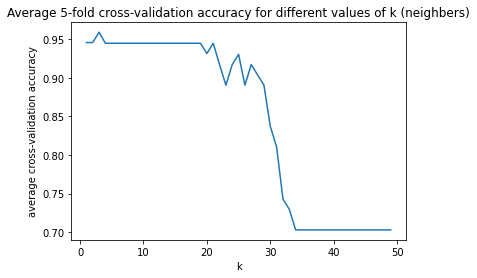

best k based on the validation accuracy: 3


In [ ]:
# Question 2, Step 3
# Observing the effect of k (number of neighbors)

K = np.arange(1,50)

recorded_accur = []

for k in K:
  KNN = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(KNN, x_train, y_train, cv=5, scoring='accuracy')
  accuracy = scores.mean()
  recorded_accur.append(accuracy)

recorded_accur = np.array(recorded_accur)

plt.figure()
plt.plot(K, recorded_accur)
plt.title("Average 5-fold cross-validation accuracy for different values of k (neighbers)")
plt.xlabel("k")
plt.ylabel("average cross-validation accuracy")
plt.show()

k_best = np.argmax(recorded_accur) + 1
print("best k based on the validation accuracy: %s"%k_best)

Then, using 5-fold cross-validation on the train data, we changed the k (number of neighbors) from 1 to 50, and plot the average validation accuracy for these values of k. As evident form the figure, k=3 reaches the highest acuuracy in the validation, and after that, increasing k decreases the performance. However, as the number of samples are very small, the validation score is not very stable in different runs of the code (without random_state=98), but this is a common result in multiple runs of the code. Again because the number of samples is very small, cross-validation is much better validation approach as it allows evaluating the trained models on the entire training data (each time on one fold), while splitting the train data to 90%-10% for validation results in a small validation set which might not even include all the 3 species (targets) and the validation score would not be as reliable for determining the best parameter (k).

In the figure, we can see that increasing k after a certain value (near 18) decreses performance because it would exceed the boundries between different classes, and the true target become less likely to be dominant in the nearest neighbors.

#CM6 "Iris" dataset

In [ ]:

# Calculating performance on test data for the best k

KNN = KNeighborsClassifier(n_neighbors=k_best)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy for the best value of k (%s):  %s"%(k_best, accuracy))
f1score = f1_score(y_test, y_pred, average='weighted')
print("Test F1-score for the best value of k (%s):  %s"%(k_best, f1score))
AUC = roc_auc_score(y_test, KNN.predict_proba(x_test), average='weighted', multi_class='ovr')
print("Test AUC score for the best value of k (%s):  %s"%(k_best, AUC))

Test accuracy for the best value of k (3):  0.9473684210526315
Test F1-score for the best value of k (3):  0.9480076709993608
Test AUC score for the best value of k (3):  1.0


At last, we trained a model with the best obtained k (7) on the whole train data, and obtained accuracy =0.947 (the same as default k=5), F1-score=0.948, AUC_score = 1 on the test data.

#CM7 "Iris" dataset

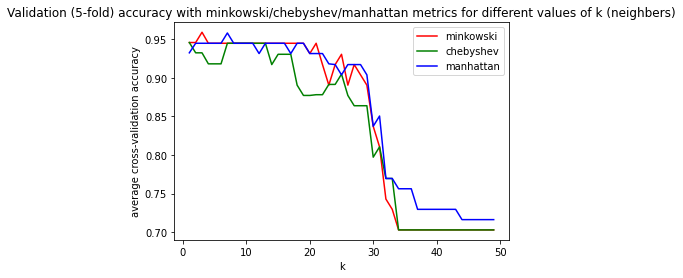

best found parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Test accuracy for the best parameters:  0.9473684210526315
Test F1-score for the best parameters:  0.9480076709993608
Test AUC score for the best parameters:  1.0


In [ ]:
# Analyzing the effect of distance metric
K = np.arange(1,50)
accuracy_minkowski = []
accuracy_chebyshev = []
accuracy_manhattan = []

for k in K:
  KNN_minkowski = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  scores = cross_val_score(KNN_minkowski, x_train, y_train, cv=5, scoring='accuracy')
  accuracy_minkowski.append(scores.mean())

  KNN_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
  scores = cross_val_score(KNN_chebyshev, x_train, y_train, cv=5, scoring='accuracy')
  accuracy_chebyshev.append(scores.mean())

  KNN_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  scores = cross_val_score(KNN_manhattan, x_train, y_train, cv=5, scoring='accuracy')
  accuracy_manhattan.append(scores.mean())

plt.figure()
plt.plot(K, accuracy_minkowski, 'r')
plt.plot(K, accuracy_chebyshev, 'g')
plt.plot(K, accuracy_manhattan, 'b')
plt.legend(["minkowski", "chebyshev", "manhattan"])
plt.title("Validation (5-fold) accuracy with minkowski/chebyshev/manhattan metrics for different values of k (neighbers)")
plt.xlabel("k")
plt.ylabel("average cross-validation accuracy")
plt.show()


# Finding the best parameters with exhaustive grid search

K = np.arange(1,50)
Weights = ['uniform', 'distance']
Algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
P = [2, 3]
Metric = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']

parameters = {'n_neighbors':K, 'weights':Weights, 'algorithm':Algorithms, 'p':P, 'metric':Metric}

KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, parameters)
clf.fit(x_train, y_train)
print("best found parameters: %s"%clf.best_params_)

# Calculating performance on test data for the best found parameters
KNN = clf.best_estimator_
y_pred = KNN.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy for the best parameters:  %s"%accuracy)
f1score = f1_score(y_test, y_pred, average='weighted')
print("Test F1-score for the best parameters:  %s"%f1score)
AUC = roc_auc_score(y_test, clf.predict_proba(x_test), average='weighted', multi_class='ovr')
print("Test AUC score for the best parameters:  %s"% AUC)
#******************
#******************
#******************
#******************
#******************
#******************
#******************

In this part, again using 5-fold cross-validation, we ploted the average validation score fot k in (1,50) for 3 different distance metrics: minkowski, chebyshev, and manhattan.

We can see from the above figure that for iris dataset, different distance metrics have similar performance overall, but it seems that the default 'minkowski' metric slightly is better than the other two distance metrics for this dataset.

Then, using exhastive grid search, we evaluate (5-fold cross validation) KNN models with different values of k, algorithms used, p, distance merics, and weights. We have reported the best obtained parameters, and training the KNN with best obtained parameters resulted in accuracy =0.947, F1-score=0.948, AUC_score = 1 on the test data. Even though we could reach better validation accuracy by changing the parameters, the obtained accuracy on test data is lower than with the the default parameters. However, without random_state=98 in different runs of the code, we could reach a better accuracy on the test data compared to the default parameters with tuning the mentioned parameters.